In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from fpfs.simutil import LensTransform

In [4]:
flux = 40
scale = 0.2
nn = 64
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=1.5, flux=flux, trunc=4)

In [5]:
### Simulate across gamma ###
kappa = 0.00
gamma1 = np.linspace(0.01,0.05,40)
gamma1_measured = np.zeros(40)
gamma2 = 0.0
G1 = 0.001 ### fixing Flexion for now
G2 = 0.006
F1 = 0.0052
F2 = 0.009 
for i in range(len(gamma1)):
    lens = LensTransform(gamma1=gamma1[i], gamma2=gamma2, kappa=kappa,F1=F1,F2=F2,G1=G1,G2=G2)
    stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
    stamp.transform_grids(lens)
    gal_array3 = stamp.sample_galaxy(sersic_gal)
    psf_array = np.zeros(stamp.shape)
    psf_array[nn // 2, nn // 2] = 1
    coords = np.array([nn//2, nn//2])
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
    mms =  fpTask.measure(gal_array3, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
    resp1=np.average(ells['fpfs_R1E'])
    shear1=np.average(ells['fpfs_e1'])/resp1
    gamma1_measured[i] = shear1
    del stamp
    del lens

2023/10/10 02:03:07 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
I0000 00:00:1696917787.640721    7591 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
2023/10/10 02:03:07 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/10/10 02:03:07 ---  Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2023/10/10 02:03:07 ---  No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
2023/10/10 02:03:07 ---  Order of the shear estimator: nnord=4
2023/10/10 02:03:07 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:03:07 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:03:08 ---  Order of the shear estimator: nnord=4
2023/10/10 02:03:08 ---  Shapelet kernel in configuration space: si

In [ ]:
from astropy.io import fits
hdu1 = fits.PrimaryHDU(gamma1_measured)
hdu1.writeto('data/gamma1_measured_2.fits')

In [ ]:
G1 = np.linspace(0.001,0.01,10)
G2 = np.linspace(0.001,0.01,10)
F1 = np.linspace(0.001,0.01,10)
F2 = np.linspace(0.001,0.01,10)
gamma1_measured = np.zeros((10,10,10,10))
gamma1 = 0.02
gamma2 = 0.0

In [53]:
### Simulate across scale ###
kappa = 0.00
gamma1 = 0.03
gamma1_measured = np.zeros(50)
gamma2 = 0.0
G1 = 0.001 ### fixing Flexion for now
G2 = 0.006
F1 = 0.0052
F2 = 0.009 
#scale_array = np.logspace(np.log10(0.01),np.log10(0.2),50)
scale_array = np.linspace(0.2,0.005,50)
for i in range(len(scale_array)):
    lens = LensTransform(gamma1=gamma1, gamma2=gamma2, kappa=kappa,F1=F1,F2=F2,G1=G1,G2=G2)
    stamp = fpfs.simutil.Stamp(nn=64, scale=scale_array[i])
    stamp.transform_grids(lens)
    gal_array3 = stamp.sample_galaxy(sersic_gal)
    psf_array = np.zeros(stamp.shape)
    psf_array[nn // 2, nn // 2] = 1
    coords = np.array([nn//2, nn//2])
    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
    mms =  fpTask.measure(gal_array3, coords)
    mms = fpTask.get_results(mms)
    ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
    resp1=np.average(ells['fpfs_R1E'])
    shear1=np.average(ells['fpfs_e1'])/resp1
    gamma1_measured[i] = shear1
    del stamp
    del lens

2023/10/10 02:40:27 ---  Order of the shear estimator: nnord=4
2023/10/10 02:40:27 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Order of the shear estimator: nnord=4
2023/10/10 02:40:27 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Order of the shear estimator: nnord=4
2023/10/10 02:40:27 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Order of the shear estimator: nnord=4
2023/10/10 02:40:27 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec
2023/10/10 02:40:27 ---  Order of the shear estimator: n

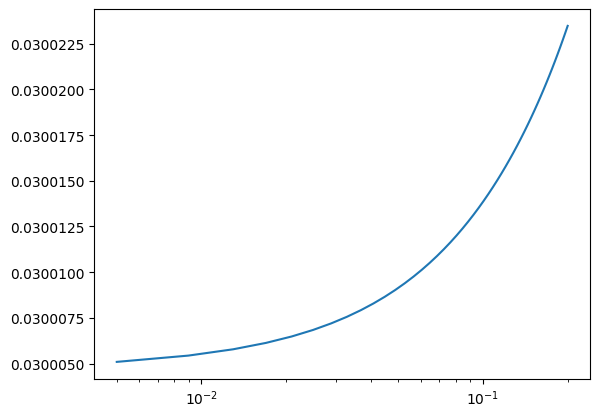

In [55]:
"""It looks like the error decrease become real slow at at scale = 0.005"""
plt.plot(scale_array,gamma1_measured)
plt.xscale('log')
plt.show()

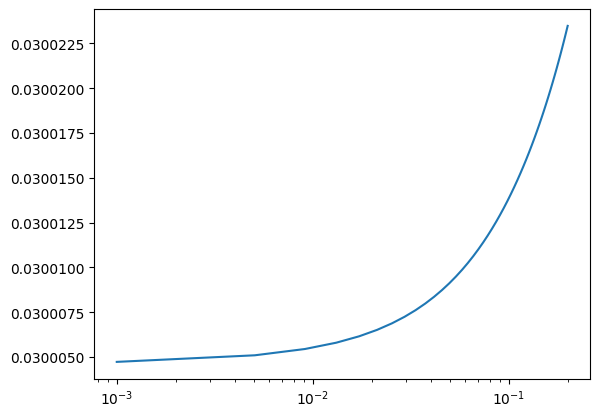

In [52]:
plt.plot(scale_array,gamma1_measured)
plt.xscale('log')
plt.show()

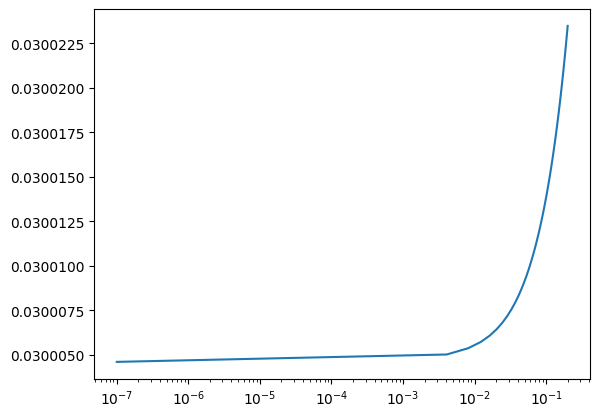

In [48]:
plt.plot(scale_array,gamma1_measured)
plt.xscale('log')
plt.show()

In [ ]:
### data for all values of flexions

for i in range(10):
    for j in range(10):
        for k in range(10):
            for l in range(10):
                #order is F1, F2, G1, G2
                lens = LensTransform(gamma1=gamma1, gamma2=gamma2, kappa=kappa,F1=F1[i],F2=F2[j],G1=G1[k],G2=G2[l])
                stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
                stamp.transform_grids(lens)
                gal_array3 = stamp.sample_galaxy(sersic_gal)
                psf_array = np.zeros(stamp.shape)
                psf_array[nn // 2, nn // 2] = 1
                coords = np.array([nn//2, nn//2])
                fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
                mms =  fpTask.measure(gal_array3, coords)
                mms = fpTask.get_results(mms)
                ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
                resp1=np.average(ells['fpfs_R1E'])
                shear1=np.average(ells['fpfs_e1'])/resp1
                gamma1_measured[i][j][k][l] = shear1
                print(i*1000+j*100+k*10+l*1)
                del stamp
                del lens
            

NameError: name 'LensTransform' is not defined

In [ ]:
gamma1_measured

array([[[[0.02002892, 0.02002939, 0.02002987, ..., 0.02003235,
          0.02003286, 0.02003338],
         [0.0200294 , 0.02002987, 0.02003035, ..., 0.02003283,
          0.02003334, 0.02003386],
         [0.02002988, 0.02003036, 0.02003083, ..., 0.02003332,
          0.02003383, 0.02003435],
         ...,
         [0.0200324 , 0.02003288, 0.02003336, ..., 0.02003584,
          0.02003635, 0.02003687],
         [0.02003293, 0.0200334 , 0.02003388, ..., 0.02003636,
          0.02003687, 0.02003739],
         [0.02003346, 0.02003393, 0.02003441, ..., 0.02003689,
          0.0200374 , 0.02003792]],

        [[0.02002676, 0.02002769, 0.02002863, ..., 0.02003343,
          0.02003441, 0.02003539],
         [0.02002723, 0.02002817, 0.02002911, ..., 0.02003391,
          0.02003489, 0.02003587],
         [0.02002772, 0.02002866, 0.0200296 , ..., 0.0200344 ,
          0.02003538, 0.02003636],
         ...,
         [0.02003024, 0.02003118, 0.02003212, ..., 0.02003692,
          0.0200379 , 0.0

In [ ]:
from astropy.io import fits
import numba
import multiprocessing
# hdu1 = fits.PrimaryHDU(gamma1_measured)
# hdu1.writeto('data/gamma1_measured_flexion_0.02.fits')

In [ ]:
print(np.linspace(0.01,0.05,9))

[0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05 ]


In [ ]:
def create_and_measure(gamma1):
    G1 = np.linspace(0.001,0.01,5)
    G2 = np.linspace(0.001,0.01,5)
    F1 = np.linspace(0.001,0.01,5)
    F2 = np.linspace(0.001,0.01,5)
    kappa=0.0
    gamma1_measured = np.zeros((len(F1),len(F2),len(G1),len(G2)))
    gamma2 = 0.0
    for i in range(len(F1)):
        for j in range(len(F2)):
            for k in range(len(G1)):
                for l in range(len(G2)):
                    #order is F1, F2, G1, G2
                    lens = LensTransform(gamma1=gamma1, gamma2=gamma2, kappa=kappa,F1=F1[i],F2=F2[j],G1=G1[k],G2=G2[l])
                    stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
                    stamp.transform_grids(lens)
                    gal_array3 = stamp.sample_galaxy(sersic_gal)
                    psf_array = np.zeros(stamp.shape)
                    psf_array[nn // 2, nn // 2] = 1
                    coords = np.array([nn//2, nn//2])
                    fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
                    mms =  fpTask.measure(gal_array3, coords)
                    mms = fpTask.get_results(mms)
                    ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
                    resp1=np.average(ells['fpfs_R1E'])
                    shear1=np.average(ells['fpfs_e1'])/resp1
                    gamma1_measured[i][j][k][l] = shear1
                    del stamp
                    del lens
    hdu1 = fits.PrimaryHDU(gamma1_measured)
    hdu1.writeto(f'data/gamma1_measured_flexion_{gamma1}.fits')  
    return  0

In [ ]:
from multiprocessing import Pool
with Pool(10) as p:
    p.map(create_and_measure,np.linspace(0.01,0.05,9))

Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/a1/opt/anaconda3/envs/universe/lib/python3.10/mul

KeyboardInterrupt: 